# An attention based deep learning model of clinical events in the intensive care unit

---

* Name: Milad Parvaneh
* NetID: sparva2
* Team ID: 143
* Paper ID: 50
* Link to a public Github repository: https://github.com/miladparvaneh/CS598_DLH_Project-Final.git
* Youtube video link: https://youtu.be/u315mU2CakY

## Notes

* The ipynb file reads the input data from 'patient_data.pkl'. I was not able to upload the file into GitHub since its size is 67.4 MB (over 25 MB limit). Therefore, I am sharing the Google Drive link for the file, which is located at: https://drive.google.com/file/d/1-0tVA6x9EhKw_dW99UiD5_uaZmHL_9Pv/view?usp=sharing.

# Introduction

*   Background of the problem

  * Problem type: For my course project, I selected a study, from the provided list of papers, that employs a deep learning model for three prediction tasks in the intensive care unit (ICU) setting [1]. The paper uses long short-term memory (LSTM) equipped with an attention mechanism to predict clinical events, including daily sepsis, myocardial infarction, and vancomycin antibiotic administration.

  * Importance/meaning of solving the problem: Healthcare professionals in ICUs are required to process vast amounts of real-time data to make accurate diagnoses and implement the right treatments. With the rising admissions to ICUs, it becomes crucial to equip them with support tools for effective care delivery.

  * The difficulty of the problem: Traditional computer-assisted decision support systems in healthcare mainly rely on scoring systems derived from feature selection and logistic or hazard regression. These systems often perform poorly when applied to outcomes they were not designed to predict [2-3]. Additionally, they struggle to capture the non-linear relationships, which are common in healthcare topics. Despite the potential of traditional machine learning models to address these issues, their lack of interpretability has led to a preference for more transparent linear models in the past.

  * The state of the art methods and effectiveness: Machine learning (ML) prediction models, trained on relevant datasets, offer valuable assistance for these purposes. Within the array of ML techniques, deep learning in particular has demonstrated promising capabilities.

*   Paper explanation

  * What did the paper propose? The study [1] suggests training a recurrent neural network (RNN) in the form of LSTM with the inclusion of a variable-level attention mechanism.

  * What is the innovations of the method? The study claims that by integrating a variable-level attention mechanism, interpretability can be achieved directly at the input variable level, rather than within a more complex and less interpretable embedded space. To be more specific, this approach allows for variable-level attention, providing insights into which input variables, such as vital signs, lab results, medications, were most influential at different points in time for the model predictions.

  * How well the proposed method work (in its own metrics)? The study's deep learning model demonstrated robust performance in predicting three clinical events in an ICU setting: sepsis, myocardial infarction (MI), and vancomycin administration. The predictive performance of the model was measured using the area under the receiver operating characteristic curve (AUC), a common metric in machine learning for evaluating the accuracy of a binary classifier.

          * Sepsis Prediction:

          Same-day AUC: 0.952
          Next-day AUC: 0.876

          * Myocardial Infarction (MI) Prediction:

          Same-day AUC: 0.834
          Next-day AUC: 0.823

          * Vancomycin Administration Prediction:

          Same-day AUC: 0.904
          Next-day AUC: 0.833

  * What are the contributions to the research regime (referring the Background above, how important the paper is to the problem)? The major contributions of this research to the clinical and machine learning fields include:

          * Introduction of Attention Mechanisms in ICU Event Prediction
          * Enhanced Interpretability
          * High Predictive Performance
          * Potential for Real-time Clinical Decision Support

        These contributions demonstrate a significant advancement in applying deep learning techniques to critical care, potentially leading to more informed and timely clinical decisions in ICUs.

# Scope of reproducibility:

The study explores whether LSTMs, with an added variable-level attention mechanism, can effectively predict clinical outcomes in the ICU based on available patient data. This method seeks to make model interpretations more accessible for clinicians by highlighting critical daily data alongside the patient's ongoing clinical progression. Here are some highlights of what the study tries to investigate:


1.   Predicting clinical events with LSTM: The study hypothesizes that LSTM, trained on a comprehensive set of ICU admission variables, can accurately predict a variety of clinical events. This is a base hypothesis for this research, suggesting that deep learning can effectively handle the temporal and complex nature of ICU data to make meaningful predictions.

2.   Enhancement of model interpretability through variable-level attention: A key hypothesis of the study is that incorporating a variable-level attention mechanism can significantly enhance the interpretability of LSTM predictions for clinicians. Unlike traditional deep learning models that may act as black boxes, the attention mechanism is expected to highlight the input variables, e.g., vital signs, lab results, medications, that are most influential in making predictions at any given time. This approach seems to mirror the clinical decision-making process, where clinicians focus on the most pertinent information to diagnose and treat patients.

3.   Generalizability across different clinical outcomes: The research, implicitly, tests the hypothesis that a single deep learning architecture can be generalized to predict multiple clinical events, such as sepsis, myocardial infarction, and the administration of the antibiotic vancomycin. This hypothesis challenges the notion that different clinical outcomes require entirely separate models, suggesting instead that a flexible deep learning approach can accommodate various prediction tasks with appropriate training.



## Checking computation resources

In [39]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


# Methodology

## Environment

* Python version: The Python version used in my current google colab notebook is 3.10.12.

In [130]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


## Dependencies/packages needed

This project uses many capabilities of the PyHealth package. In addition, many typical libraries used in common data processing and deep learning tasks are used, including Numpy, PyTorch, and Matplotlib.

### Install required packages

In [ ]:
!pip install pyhealth

### Import required libraries

In [141]:
import random
import pickle
import numpy as np
import pandas as pd
from google.colab import drive
from pyhealth.datasets import MIMIC3Dataset
from torch.utils.data import Dataset
from torch.utils.data.dataset import random_split
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


##  Data

  * Source of the data: The data used in this project is the MIMIC-III dataset [4-5]. The MIMIC-III dataset consists of anonymized data for over 40,000 patients from critical care units at Beth Israel Deaconess Medical Center from 2001 to 2012. It features patient demographics, hourly vital signs, lab results, procedures, medications, caregiver notes, imaging reports, and mortality information, including after hospital discharge. Although MIMIC-III is de-identified, it still needs user training before access can be granted. For that matter, I passed the ‘Data or Specimens Only Research’ course provided by the CITI program. I, then, applied and was approved for dataset access through PhysioNet.

  * Input data statistics are printed out in the corresponding code snippet below.

  * Data process:
    * Among the three prediction tasks defined for this project, I dicided to work on sepsis prediction. Checking the raw dataset, it turns out that only around 10% of the patients are diagnosed with sepsis (class imbalance). With 90% of the data belonging to the negative class, a machine learning model might learn to predominantly predict the majority class because doing so would still yield a high overall accuracy. For example, a naive model that always predicts 'negative' would be correct 90% of the time, misleadingly suggesting high performance. The model may fail to capture the patterns and characteristics of the positive class due to its underrepresentation. This often results in poor generalization capabilities when encountering new positive samples outside of the training set. Several techniques can be used to mitigate the effects of class imbalance, one of which is reducing the number of negative samples to balance the dataset. Here, I decided to drop a portion of negative samples and *randomly* keep around 14'000 which leads to 25% positive samples rate.

    * Additionally, including sepsis diagnosis codes directly within the input features (seqs) could bias the model. The model might learn simply to look for those codes rather than identifying patterns that predict sepsis before it's officially diagnosed. To make the model more practical and robust, it's a good idea to remove the sepsis-related diagnosis codes from the seqs before using them as input for training.

    * The dataset is splitted to train/valid sets as 80/20.

    * For the sepsis prediction task, the diagnosis, procedures, medications, and laboratory measurement instances within each visit for a given patient are considered as the input features.

Based on the features list provided by the paper (not included in the paper manuscript, but can be downloaded from the paper webpage and also available at the project GitHub link as final-feature-list-from-paper.pdf), here's a breakdown of which tables from the MIMIC-III dataset we may need to access to extract each type of feature:

### Complete Blood Count and Differential:
* Table: LABEVENTS
* This table contains results from laboratory tests and would cover items such as red blood cells (RBCs), white blood cells (WBCs), platelets, hemoglobin, hematocrit, and various types of leukocytes (neutrophils, lymphocytes, etc.).

### Vitals:
* Table: CHARTEVENTS
* Vital signs like temperature, heart rate, respiratory rate, blood pressure, and pulse oximetry are usually found in the CHARTEVENTS table, which records all charted data related to patient care.

### Labs:
* Table: LABEVENTS
* Lab results such as troponin, HDL, LDL, BUN, creatinine, glucose, and electrolytes (sodium, potassium, chloride) are also located in LABEVENTS.

### Cultures and Other Tests:
* Table: MICROBIOLOGYEVENTS
* This table is used for microbiological tests and would include blood, urine, sputum, and wound cultures.

### Respiratory Settings:
* Table: CHARTEVENTS
* Settings like inspired O2 fraction, PEEP set, tidal volume, and other ventilator settings are found in CHARTEVENTS.

### Demographics:
* Table: PATIENTS and ADMISSIONS
* Information such as age, gender, and race can be derived from these tables. Age might need to be calculated from the date of birth provided in the PATIENTS table in relation to the admission date in the ADMISSIONS table.

### Medications:
* Table: PRESCRIPTIONS
* This table contains details about medications prescribed to the patient during their stay, covering all the listed drugs like epoetin, warfarin, heparin, etc.

However, based on PyHealth documentation at [https://pyhealth.readthedocs.io/en/latest/api/datasets/pyhealth.datasets.MIMIC3Dataset.html], the supported tables are: PATIENTS, ADMISSIONS, DIAGNOSES_ICD, PROCEDURES_ICD, PRESCRIPTIONS, and LABEVENTS. Therefore, I will be using these tables to form the input features. The resultant features will not be identical as those used in the paper; however, this is the closest we can get given the PyHealth MIMIC3Dataset capabilities implemented so far. Also, note that basic tables, PATIENTS and ADMISSIONS, are parsed by default and do not need to be explicitly selected.

## Reading Data from Saved File

Since importing the raw data and its pre-processing took significant time, I saved the resultant output file to be read later in the code. That is why some code snippets below are commented out. They were initially used to load and process the raw data, and are shown here as a reference. Later in the code, the proceesed data is read from a file named 'patient_data.pkl'.

In [ ]:
#mimic3_ds = MIMIC3Dataset(root = '/content/drive/MyDrive/Colab Notebooks/CS598_DLH_Project_NEW/mimic-iii-clinical-database-1.4',
#        tables = ['DIAGNOSES_ICD', 'PROCEDURES_ICD', 'PRESCRIPTIONS', 'LABEVENTS'],
#)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


finish basic patient information parsing : 22.10043740272522s


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


finish parsing DIAGNOSES_ICD : 30.748191595077515s


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


finish parsing PROCEDURES_ICD : 17.25616955757141s


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


finish parsing PRESCRIPTIONS : 133.42394948005676s


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


finish parsing LABEVENTS : 598.4602560997009s


Mapping codes: 100%|██████████| 46520/46520 [00:11<00:00, 3900.31it/s]


In [ ]:
#mimic3_ds.info()


dataset.patients: patient_id -> <Patient>

<Patient>
    - visits: visit_id -> <Visit> 
    - other patient-level info
    
    <Visit>
        - event_list_dict: table_name -> List[Event]
        - other visit-level info
    
        <Event>
            - code: str
            - other event-level info



In [ ]:
#with open('/content/drive/MyDrive/Colab Notebooks/CS598_DLH_Project_NEW/mimic3_ds.pkl', 'wb') as f:
#    pickle.dump(mimic3_ds, f)

In [ ]:
#with open('/content/drive/MyDrive/Colab Notebooks/CS598_DLH_Project_NEW/mimic3_ds.pkl', 'rb') as f:
#    mimic3_ds = pickle.load(f)

In [ ]:
#mimic3_ds.info()


dataset.patients: patient_id -> <Patient>

<Patient>
    - visits: visit_id -> <Visit> 
    - other patient-level info
    
    <Visit>
        - event_list_dict: table_name -> List[Event]
        - other visit-level info
    
        <Event>
            - code: str
            - other event-level info



In [ ]:
#print(len(mimic3_ds.patients))

46520


In [ ]:
#mimic3_ds.patients['10848'].visits['143011'].event_list_dict['PRESCRIPTIONS']

### TASK: Prediction of sepsis

In [ ]:
## Define sepsis-related ICD-9 codes
#sepsis_codes = {'99591', '78552', '99592'}  # Add more codes as necessary
## sepsis_codes = {'4019'}

## Initialize a dictionary to hold the sepsis flag for each patient
#patient_sepsis_status = {}

## Loop through each patient in the MIMIC3Dataset
#for patient_id, patient_obj in mimic3_ds.patients.items():
#    patient_has_sepsis = False  # Initialize flag for each patient

#    # Loop through each visit in the patient's record
#    for visit_id, visit_obj in patient_obj.visits.items():
#        # Access the list of diagnosis events
#        diagnosis_events = visit_obj.event_list_dict.get('DIAGNOSES_ICD', [])

#        # Check if any of the diagnosis codes in the events are sepsis-related
#        for event in diagnosis_events:
#            if event.code in sepsis_codes:
#                patient_has_sepsis = True
#                break  # Stop checking if sepsis is confirmed

#        if patient_has_sepsis:
#            break  # Stop checking further visits if sepsis is confirmed

#    # Store the sepsis status in the dictionary
#    patient_sepsis_status[patient_id] = patient_has_sepsis

#number_of_sepsis_patients = sum(patient_sepsis_status.values())

#print("Number of patients with sepsis:", number_of_sepsis_patients)

Number of patients with sepsis: 4689


In [ ]:
## Define target numbers based on your description
#num_sepsis_patients = number_of_sepsis_patients
#num_non_sepsis_patients = 3 * num_sepsis_patients  # This is chosen to be about three times the number of sepsis patients

## Separate patient IDs into sepsis and non-sepsis lists
#sepsis_patient_ids = [pid for pid, has_sepsis in patient_sepsis_status.items() if has_sepsis]
#non_sepsis_patient_ids = [pid for pid, has_sepsis in patient_sepsis_status.items() if not has_sepsis]

## Randomly select non-sepsis patients to achieve the desired ratio
#random_selected_non_sepsis = random.sample(non_sepsis_patient_ids, num_non_sepsis_patients)

## Combine lists
#final_patient_ids = sepsis_patient_ids + random_selected_non_sepsis

## Shuffle the combined list to mix sepsis and non-sepsis patients
#random.shuffle(final_patient_ids)

## Initialize containers
#pids = []     # List of patient IDs
#vids = []     # List of lists, where each sublist contains visit IDs for a patient
#sepsis = []   # List of sepsis labels for each patient (0 for normal, 1 for sepsis)
#seqs = []     # List of lists of lists for diagnosis codes
#procedures = []
#prescriptions = []
#labs = []

## Populate the data structures with the final selected patient IDs
#for pid in final_patient_ids:
#    patient_obj = mimic3_ds.patients[pid]
#    pids.append(pid)
#    patient_vids = []
#    patient_seqs = []
#    patient_procedures = []
#    patient_prescriptions = []
#    patient_labs = []

#    for visit_id, visit_obj in patient_obj.visits.items():
#        patient_vids.append(visit_id)

#        # Diagnosis codes
#        diagnosis_events = visit_obj.event_list_dict.get('DIAGNOSES_ICD', [])

#        # Filter out sepsis-related codes
#        filtered_codes = [event.code for event in diagnosis_events if event.code not in sepsis_codes]
#        patient_seqs.append(filtered_codes)

#        # Procedure codes
#        procedure_events = visit_obj.event_list_dict.get('PROCEDURES_ICD', [])
#        patient_procedures.append([event.code for event in procedure_events])

#        # Prescription details
#        prescription_events = visit_obj.event_list_dict.get('PRESCRIPTIONS', [])
#        patient_prescriptions.append([event.code for event in prescription_events])

#        # Lab results
#        lab_events = visit_obj.event_list_dict.get('LABEVENTS', [])
#        patient_labs.append([event.code for event in lab_events])

#    vids.append(patient_vids)
#    seqs.append(patient_seqs)
#    sepsis.append(1 if patient_sepsis_status[pid] else 0)
#    procedures.append(patient_procedures)
#    prescriptions.append(patient_prescriptions)
#    labs.append(patient_labs)

#print(len(pids), len(vids), len(sepsis), len(seqs), len(procedures), len(prescriptions), len(labs))

18756 18756 18756 18756 18756 18756 18756


In [ ]:
## Save data using pickle
#with open('/content/drive/MyDrive/Colab Notebooks/CS598_DLH_Project_NEW/patient_data.pkl', 'wb') as file:
#    pickle.dump({'pids': pids, 'vids': vids, 'sepsis': sepsis, 'seqs': seqs, 'procedures': procedures, 'prescriptions': prescriptions, 'labs': labs}, file)

#print("Data saved with pickle.")

Data saved with pickle.


In [ ]:
# Load data using pickle
#with open('/content/drive/MyDrive/Colab Notebooks/CS598_DLH_Project_NEW/patient_data.pkl', 'rb') as file:
#    data_loaded = pickle.load(file)

with open('patient_data.pkl', 'rb') as file:
    data_loaded = pickle.load(file)

pids = data_loaded['pids']
vids = data_loaded['vids']
sepsis = data_loaded['sepsis']
seqs = data_loaded['seqs']
procedures = data_loaded['procedures']
prescriptions = data_loaded['prescriptions']
labs = data_loaded['labs']

print("Data loaded with pickle.")

Data loaded with pickle.


### Sample data instance

In [ ]:
print("Patient ID:", pids[3])
print("Sepsis status:", sepsis[3])
print("# of visits:", len(vids[3]))
for visit in range(len(vids[3])):
    print(f"\t{visit}-th visit id:", vids[3][visit])
    print(f"\t{visit}-th visit diagnosis labels:", seqs[3][visit])
    print(f"\t{visit}-th visit procedures:", procedures[3][visit])
    print(f"\t{visit}-th visit prescriptions:", prescriptions[3][visit])
    print(f"\t{visit}-th visit labs:", labs[3][visit])

Patient ID: 10302
Sepsis status: 1
# of visits: 2
	0-th visit id: 119529
	0-th visit diagnosis labels: ['0389', '5070', '51881', '20410', '5849', '41071', '2760', '41400', '40390', '5859', '496', '4280', 'V4501', 'V440', '2875', '2767', '28522']
	0-th visit procedures: ['9672', '3893', '3891', '966']
	0-th visit prescriptions: ['60505068104', '00338055318', '0', '00338011704', '63323026201', '00338001704', '00338011704', '00338011704', '00338011704', '00338004938', '46287000660', '00338001704', '00338001704', '00338004904', '00338055318', '00310032520', '63323018410', '66591018442', '63323001302', '00002821501', '49502069724', '00338355248', '0', '10019002710', '00008092355', '00338004938', '54569523500', '10019003783', '00703115303', '00310032520', '00045006601', '00338001702', '0', '00338004902', '0', '00338055318', '00071015892', '63739002401', '10019003867', '00009090020', '0', '00338004904', '63323031110', '00338004903', '00338004903', '0', '00338004902', '63323031110', '633230311

In [42]:
print("Number of patients with sepsis:", sum(sepsis))
print("Ratio of patients with sepsis: %.2f" % (sum(sepsis) / len(sepsis)))

Number of patients with sepsis: 4689
Ratio of patients with sepsis: 0.25


## Data statistics

In [135]:
def calculate_stats(pids, vids, sepsis, seqs, procedures, prescriptions, labs):
    # Print basic information
    print(f"Total patients: {len(pids)}")
    print(f"Total sepsis cases: {sum(sepsis)}")
    print(f"Percentage of sepsis cases: {sum(sepsis) / len(sepsis) * 100:.2f}%")

    # Calculate visits statistics
    visits_counts = [len(v) for v in vids]
    print(f"Average number of visits per patient: {np.mean(visits_counts):.2f}")
    print(f"Maximum number of visits by a single patient: {np.max(visits_counts)}")
    print(f"Minimum number of visits by a single patient: {np.min(visits_counts)}")

    # Flatten diagnosis codes to calculate frequencies
    all_diagnoses = [code for patient in seqs for visit in patient for code in visit]
    unique_diagnoses, counts = np.unique(all_diagnoses, return_counts=True)
    print(f"Total unique diagnosis codes: {len(unique_diagnoses)}")
    print(f"Most common diagnosis code: {unique_diagnoses[np.argmax(counts)]} with {np.max(counts)} occurrences")

    # Statistics for procedures
    all_procedures = [code for patient in procedures for visit in patient for code in visit]
    unique_procedures, procedure_counts = np.unique(all_procedures, return_counts=True)
    print(f"Total unique procedure codes: {len(unique_procedures)}")
    print(f"Most common procedure code: {unique_procedures[np.argmax(procedure_counts)]} with {np.max(procedure_counts)} occurrences")

    # Statistics for prescriptions
    all_prescriptions = [code for patient in prescriptions for visit in patient for code in visit]
    unique_prescriptions, prescription_counts = np.unique(all_prescriptions, return_counts=True)
    print(f"Total unique prescription codes: {len(unique_prescriptions)}")
    print(f"Most common prescription code: {unique_prescriptions[np.argmax(prescription_counts)]} with {np.max(prescription_counts)} occurrences")

    # Statistics for lab tests
    all_labs = [code for patient in labs for visit in patient for code in visit]
    unique_labs, lab_counts = np.unique(all_labs, return_counts=True)
    print(f"Total unique lab test codes: {len(unique_labs)}")
    print(f"Most common lab test code: {unique_labs[np.argmax(lab_counts)]} with {np.max(lab_counts)} occurrences")

    # Handling missing data in sequences
    empty_visits = sum(1 for patient in seqs for visit in patient if not visit)
    print(f"Number of empty visits across all patients: {empty_visits}")

    stats = {
        'total_patients': len(pids),
        'total_sepsis_cases': sum(sepsis),
        'sepsis_percentage': sum(sepsis) / len(sepsis) * 100,
        'visits_counts': visits_counts,
        'max_visits': np.max(visits_counts),
        'min_visits': np.min(visits_counts),
        'unique_diagnoses': unique_diagnoses,
        'diagnosis_counts': counts,
        'unique_procedures': unique_procedures,
        'procedure_counts': procedure_counts,
        'unique_prescriptions': unique_prescriptions,
        'prescription_counts': prescription_counts,
        'unique_labs': unique_labs,
        'lab_counts': lab_counts,
        'empty_visits': empty_visits
    }

    return stats


stats = calculate_stats(pids, vids, sepsis, seqs, procedures, prescriptions, labs)

Total patients: 18756
Total sepsis cases: 4689
Percentage of sepsis cases: 25.00%
Average number of visits per patient: 1.36
Maximum number of visits by a single patient: 42
Minimum number of visits by a single patient: 1
Total unique diagnosis codes: 5705
Most common diagnosis code: 4019 with 8744 occurrences
Total unique procedure codes: 1662
Most common procedure code: 3893 with 8261 occurrences
Total unique prescription codes: 3888
Most common prescription code: 0 with 298044 occurrences
Total unique lab test codes: 698
Most common lab test code: 51221 with 344723 occurrences
Number of empty visits across all patients: 17


## Data descriptions with helpful charts and visualizations

Descriptions and visualizations are provided in the following code snippets after reading the input file.

### Patient Sepsis Incidence
  
A simple pie chart to show the proportion of sepsis cases among the patients.

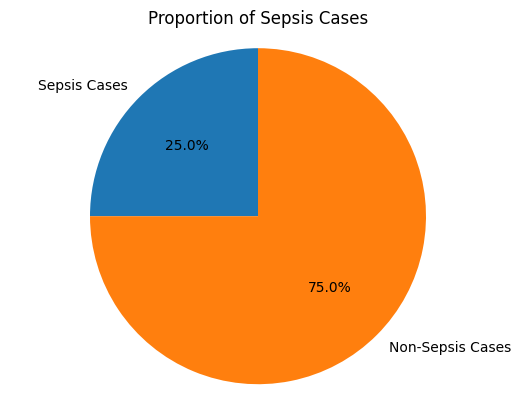

In [131]:
# Data preparation
labels = 'Sepsis Cases', 'Non-Sepsis Cases'
sizes = [4689, 18756 - 4689]

# Plotting
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Proportion of Sepsis Cases')
plt.show()

### Visit Statistics
A histogram to visualize the distribution of the number of visits per patient.

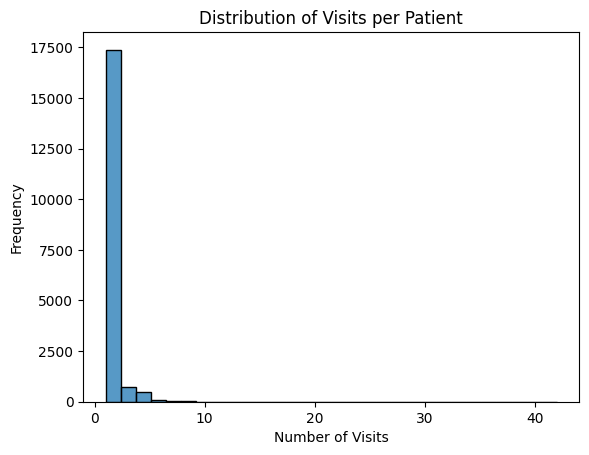

In [136]:
sns.histplot(stats['visits_counts'], kde=False, bins=30)
plt.title('Distribution of Visits per Patient')
plt.xlabel('Number of Visits')
plt.ylabel('Frequency')
plt.show()

## Common Codes Frequency
Bar charts for the most common diagnosis, procedure, prescription, and lab codes. It’s helpful to visualize the top N codes to see the distribution and frequency of the most common entries.

<ipython-input-143-db2cde8ddbd4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_codes, y=top_counts, palette='viridis')


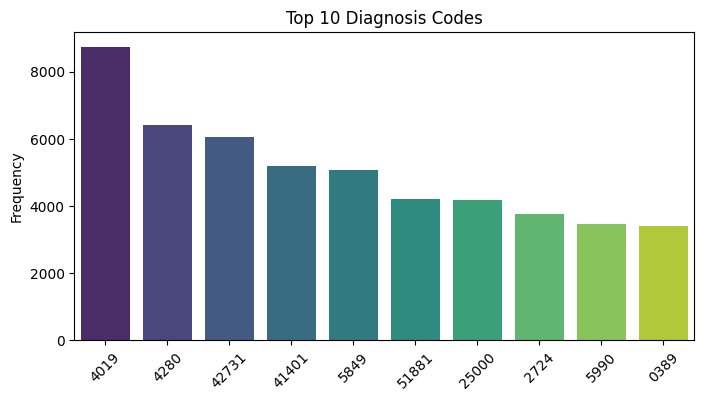

<ipython-input-143-db2cde8ddbd4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_codes, y=top_counts, palette='viridis')


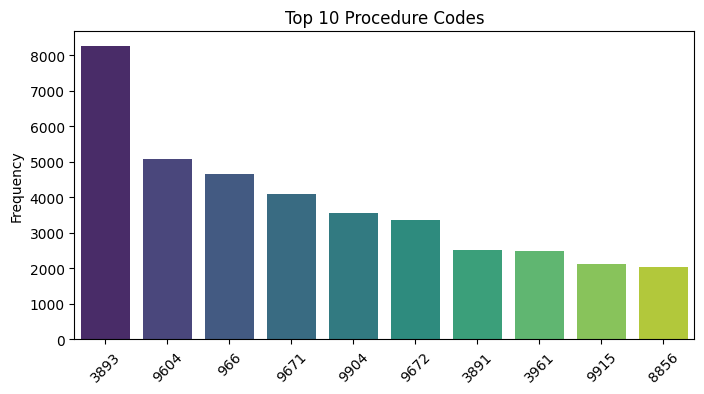

<ipython-input-143-db2cde8ddbd4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_codes, y=top_counts, palette='viridis')


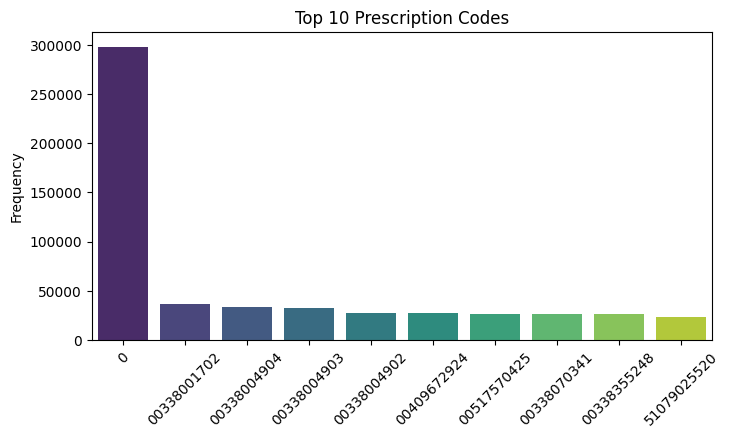

<ipython-input-143-db2cde8ddbd4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_codes, y=top_counts, palette='viridis')


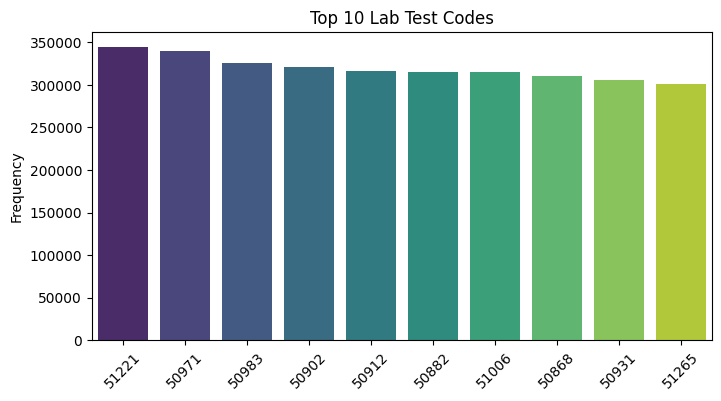

In [143]:
def plot_top_codes(codes, counts, title, top_n=10):
    # Sort codes by counts
    sorted_indices = np.argsort(-counts)
    top_codes = codes[sorted_indices][:top_n]
    top_counts = counts[sorted_indices][:top_n]

    # plt.figure(figsize=(10, 6))
    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_codes, y=top_counts, palette='viridis')
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Now using the dictionary keys to access the data
plot_top_codes(stats['unique_diagnoses'], stats['diagnosis_counts'], 'Top 10 Diagnosis Codes')
plot_top_codes(stats['unique_procedures'], stats['procedure_counts'], 'Top 10 Procedure Codes')
plot_top_codes(stats['unique_prescriptions'], stats['prescription_counts'], 'Top 10 Prescription Codes')
plot_top_codes(stats['unique_labs'], stats['lab_counts'], 'Top 10 Lab Test Codes')

## Empty Visits Visualization
A pie chart to show the proportion of empty visits.



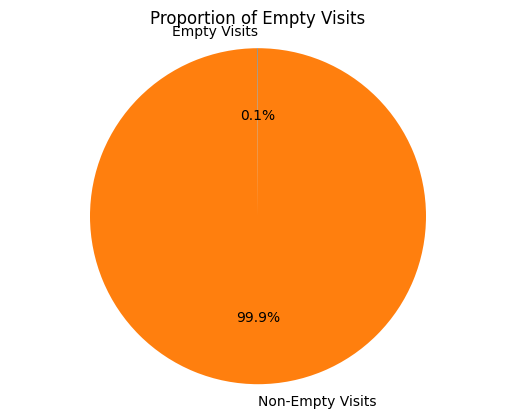

In [140]:
total_visits = sum(stats['visits_counts'])
non_empty_visits = total_visits - stats['empty_visits']

# Prepare data for the pie chart
labels = 'Empty Visits', 'Non-Empty Visits'
sizes = [stats['empty_visits'], non_empty_visits]

# Create pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Proportion of Empty Visits')
plt.show()

### Convert Diagnosis Codes to Numeric IDs

To maintain a comprehensive mapping of all codes across different types of medical data (diagnoses, procedures, prescriptions, and labs), we would need to include these tables. Each of these tables can have unique codes that also need to be mapped to numeric IDs for consistent handling in data processing or modeling.

Here's how we can create a unified code_to_id dictionary that includes diagnosis codes, procedure codes, prescription identifiers, and lab test codes:

In [ ]:
code_to_id = {}
current_id = 0

# Function to add codes to the dictionary
def add_codes_to_dict(codes):
    global current_id
    for code in codes:
        if code not in code_to_id:
            code_to_id[code] = current_id
            current_id += 1

# Process diagnosis codes
for patient_visits in seqs:
    for visit in patient_visits:
        add_codes_to_dict(visit)

# Process procedure codes
for patient_visits in procedures:
    for visit in patient_visits:
        add_codes_to_dict(visit)

# Process prescription codes
for patient_visits in prescriptions:
    for visit in patient_visits:
        add_codes_to_dict(visit)

# Process lab test codes
for patient_visits in labs:
    for visit in patient_visits:
        add_codes_to_dict(visit)

print(f"Total unique codes across all tables: {len(code_to_id)}")

Total unique codes across all tables: 11576


In [ ]:
max_index = max(code_to_id.values())
print("Maximum index in code_to_id:", max_index)

Maximum index in code_to_id: 11575


### Custom Dataset

Here, I implement a custom dataset, which will mark the key features of the dataset. I will use the sequences of diagnosis codes seqs as input and sepsis as output.

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, seqs, procedures, prescriptions, labs, sepsis):
        # Store the raw code sequences
        self.x_seqs = seqs
        self.x_procs = procedures
        self.x_pres = prescriptions
        self.x_labs = labs
        self.y = sepsis

    def __len__(self):
        return len(self.y)

    def __getitem__(self, index):
        # Each entry in the dataset is a tuple containing:
        # Different types of medical data (sequences, procedures, prescriptions, labs) and the corresponding sepsis label
        return (self.x_seqs[index], self.x_procs[index], self.x_pres[index], self.x_labs[index]), self.y[index]

dataset = CustomDataset(seqs, procedures, prescriptions, labs, sepsis)

Here, the collate function is called by DataLoader after fetching a list of samples using the indices from CustomDataset to collate the list of samples into batches.

In [ ]:
def collate_fn(data):
    # Unpack data; each element in data now includes multiple types of medical data
    all_data, labels = zip(*data)
    sequences, procedures, prescriptions, labs = zip(*all_data)

    y = torch.tensor(labels, dtype=torch.float)

    num_patients = len(sequences)
    num_visits = [len(patient) for patient in sequences]  # Assumes visits count is the same across all data types

    # Initialize tensors for forward and reverse data
    max_num_visits = max(num_visits)
    max_num_codes = {
        'seq': max(len(visit) for patient in sequences for visit in patient),
        'proc': max(len(visit) for patient in procedures for visit in patient),
        'pres': max(len(visit) for patient in prescriptions for visit in patient),
        'labs': max(len(visit) for patient in labs for visit in patient)
    }

    data_dict = {key: {'forward': torch.zeros((num_patients, max_num_visits, max_num_codes[key]), dtype=torch.long),
                       'reverse': torch.zeros((num_patients, max_num_visits, max_num_codes[key]), dtype=torch.long),
                       'mask_forward': torch.zeros((num_patients, max_num_visits, max_num_codes[key]), dtype=torch.bool),
                       'mask_reverse': torch.zeros((num_patients, max_num_visits, max_num_codes[key]), dtype=torch.bool)}
                 for key in ['seq', 'proc', 'pres', 'labs']}

    # Populate tensors for each type of medical data
    for i_patient, (patient_seq, patient_proc, patient_pres, patient_lab) in enumerate(zip(sequences, procedures, prescriptions, labs)):
        for data_type, patient_data in zip(['seq', 'proc', 'pres', 'labs'], [patient_seq, patient_proc, patient_pres, patient_lab]):
            rev_patient_data = patient_data[::-1]
            for j_visit, (visit_data, rev_visit_data) in enumerate(zip(patient_data, rev_patient_data)):
                numeric_codes = [code_to_id[code] for code in visit_data]
                len_codes = len(numeric_codes)
                data_dict[data_type]['forward'][i_patient, j_visit, :len_codes] = torch.tensor(numeric_codes, dtype=torch.long)
                data_dict[data_type]['mask_forward'][i_patient, j_visit, :len_codes] = 1

                rev_numeric_codes = [code_to_id[code] for code in rev_visit_data]
                data_dict[data_type]['reverse'][i_patient, j_visit, :len(rev_numeric_codes)] = torch.tensor(rev_numeric_codes, dtype=torch.long)
                data_dict[data_type]['mask_reverse'][i_patient, j_visit, :len(rev_numeric_codes)] = 1

    return {
        'seqs_forward': data_dict['seq']['forward'],
        'seqs_reverse': data_dict['seq']['reverse'],
        'seqs_mask_forward': data_dict['seq']['mask_forward'],
        'seqs_mask_reverse': data_dict['seq']['mask_reverse'],
        'procs_forward': data_dict['proc']['forward'],
        'procs_reverse': data_dict['proc']['reverse'],
        'procs_mask_forward': data_dict['proc']['mask_forward'],
        'procs_mask_reverse': data_dict['proc']['mask_reverse'],
        'pres_forward': data_dict['pres']['forward'],
        'pres_reverse': data_dict['pres']['reverse'],
        'pres_mask_forward': data_dict['pres']['mask_forward'],
        'pres_mask_reverse': data_dict['pres']['mask_reverse'],
        'labs_forward': data_dict['labs']['forward'],
        'labs_reverse': data_dict['labs']['reverse'],
        'labs_mask_forward': data_dict['labs']['mask_forward'],
        'labs_mask_reverse': data_dict['labs']['mask_reverse'],
        'labels': y
    }

Splitting the dataset into training and validation sets.

In [ ]:
split = int(len(dataset)*0.8)

lengths = [split, len(dataset) - split]
train_dataset, val_dataset = random_split(dataset, lengths)

print("Length of train dataset:", len(train_dataset))
print("Length of val dataset:", len(val_dataset))

Length of train dataset: 15004
Length of val dataset: 3752


Loading the dataset into the data loader.

In [ ]:
def load_data(train_dataset, val_dataset, collate_fn):
    batch_size = 32

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

    return train_loader, val_loader


train_loader, val_loader = load_data(train_dataset, val_dataset, collate_fn)

##   Model

As mentioned earlier, the study [1] suggests training a recurrent neural network (RNN) in the form of LSTM with the inclusion of a variable-level attention mechanism. However, as a starting point, I implemented two ML models: a naive RNN using GRUs and RETAIN which is a RNN model with attention mechanism [6]. For these implementations, I borrowed some of my as well as provided coding from the Homeworks.

The original paper’s repo is at: https://github.com/deepak-kaji/mimic-lstm.

### Naive RNN

The architecture of the model is a bidirectional Recurrent Neural Network (RNN) using Gated Recurrent Units (GRUs) for processing sequences, specifically designed for sequence classification tasks. Here’s a breakdown of each component and its role within the architecture:

* Embedding Layer: Converts each integer-encoded diagnosis code into a dense vector representation. The Embedding layer has num_embeddings which equals the total number of unique diagnosis codes (num_codes), and each embedding has a dimension of embDimSize (128 in this case).

* Bidirectional GRU Layers: A type of RNN that is effective in capturing dependencies in time-series data or sequences. It has gating mechanisms (update and reset gates) that regulate the flow of information and help in learning long-range dependencies in data. Both GRU layers have an input_size set to embDimSize (128) times the number of input data types (4), and hidden_size of embDimSize (128).

* Linear and Sigmoid Output Layers.

We initially need to transform the codes for each data type for any given visit to an embedding.

In [ ]:
# Not used!
def sum_embeddings_with_mask_forward(data_dict):
    """
    Sum embeddings for each type of medical data using masks.

    Args:
    - data_dict: Dictionary containing tensors for sequences, procedures, prescriptions, labs, and their respective masks.

    Returns:
    - summed_embeddings: Dictionary of summed embeddings for each data type.
    """
    summed_embeddings = {}
    for data_type in ['seqs', 'procs', 'pres', 'labs']:
        x = data_dict[f'{data_type}_forward']
        masks = data_dict[f'{data_type}_mask_forward']

        masks_expanded = masks.unsqueeze(-1).type_as(x)
        masked_embeddings = x * masks_expanded
        sum_embeddings = masked_embeddings.sum(dim=2)

        summed_embeddings[data_type] = sum_embeddings

    return summed_embeddings

In [ ]:
# Not used!
def sum_embeddings_with_mask_reverse(data_dict):
    """
    Sum embeddings for each type of medical data using masks.

    Args:
    - data_dict: Dictionary containing tensors for sequences, procedures, prescriptions, labs, and their respective masks.

    Returns:
    - summed_embeddings: Dictionary of summed embeddings for each data type.
    """
    summed_embeddings = {}
    for data_type in ['seqs', 'procs', 'pres', 'labs']:
        x = data_dict[f'{data_type}_reverse']
        masks = data_dict[f'{data_type}_mask_reverse']

        masks_expanded = masks.unsqueeze(-1).type_as(x)
        masked_embeddings = x * masks_expanded
        sum_embeddings = masked_embeddings.sum(dim=2)

        summed_embeddings[data_type] = sum_embeddings

    return summed_embeddings

In [ ]:
def sum_embeddings_with_mask(x, masks):
    """
    Sum embeddings for a type of medical data using masks.

    Args:
    - x: Tensor containing the embeddings for sequences, procedures, prescriptions, or labs.
    - masks: Corresponding masks for the embeddings.

    Returns:
    - sum_embeddings: Tensor of summed embeddings.
    """
    masks_expanded = masks.unsqueeze(-1).type_as(x)
    masked_embeddings = x * masks_expanded
    sum_embeddings = masked_embeddings.sum(dim=2)
    return sum_embeddings

In [ ]:
def get_last_visit(hidden_states, masks):
    # Determine the last visit index for each patient
    # Any visit with at least one non-zero entry in its mask is considered a valid visit
    visit_presence = masks.any(dim=2)  # Find if there's any true value along dimension 2 (codes)

    # Find the index of the last true (presence of visit) for each patient
    last_visit_indices = torch.arange(visit_presence.size(1), device=hidden_states.device).expand(visit_presence.size(0), -1)
    last_visit_indices = (last_visit_indices * visit_presence).max(dim=1)[0]

    # Gather the hidden states from the last visit
    batch_indices = torch.arange(0, hidden_states.size(0), device=hidden_states.device)
    last_hidden_state = hidden_states[batch_indices, last_visit_indices]

    return last_hidden_state

My initial NaiveRNN class implementation for handling bidirectional GRU processing worked for the scenario where we had a single type of data (diagnosis sequences). However, based on new changes that introduces multiple types of medical data (sequences, procedures, prescriptions, labs), the model needs to either handle multiple data types separately or merge them intelligently before processing through the RNN layers. I decided to concatenate embeddings from all types after embedding but before the RNN.

In [ ]:
class NaiveRNN(nn.Module):
    def __init__(self, num_codes):
        super().__init__()

        self.embedding = None
        self.rnn = None
        self.rev_rnn = None
        self.fc = None
        self.sigmoid = None

        embDimSize = 128
        emb_dim_size = 128
        num_data_types=4

        self.embedding = nn.Embedding(num_embeddings=num_codes, embedding_dim=embDimSize)

        #self.rnn = nn.GRU(input_size=embDimSize, hidden_size=embDimSize, batch_first=True)
        #self.rev_rnn = nn.GRU(input_size=embDimSize, hidden_size=embDimSize, batch_first=True)

        self.rnn = nn.GRU(input_size=emb_dim_size * num_data_types, hidden_size=emb_dim_size, batch_first=True)
        self.rev_rnn = nn.GRU(input_size=emb_dim_size * num_data_types, hidden_size=emb_dim_size, batch_first=True)

        self.fc = nn.Linear(in_features=2*embDimSize, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self,  **kwargs):
        """
        Extend forward pass to handle dictionary of different medical data types.
        """
        batch_size = kwargs['seqs_forward'].shape[0]

        # Embed and sum each type of data
        embeddings = []
        reverse_embeddings = []

        for data_type in ['seqs', 'procs', 'pres', 'labs']:
            x = self.embedding(kwargs[f'{data_type}_forward'])
            masks = kwargs[f'{data_type}_mask_forward']
            # x = sum_embeddings_with_mask_forward(x, kwargs[f'{data_type}_mask_forward'])
            x = sum_embeddings_with_mask(x, masks)
            embeddings.append(x)

            # Handle reverse data
            rev_x = self.embedding(kwargs[f'{data_type}_reverse'])
            rev_masks = kwargs[f'{data_type}_mask_reverse']
            rev_x = sum_embeddings_with_mask(rev_x, rev_masks)
            # rev_x = sum_embeddings_with_mask_reverse(rev_x, kwargs[f'{data_type}_mask_reverse'])
            reverse_embeddings.append(rev_x)

        # Concatenate forward and reverse embeddings separately
        forward_embeddings = torch.cat(embeddings, dim=-1)
        reverse_embeddings = torch.cat(reverse_embeddings, dim=-1)

        # Pass embeddings through RNN layers
        output, _ = self.rnn(forward_embeddings)
        rev_output, _ = self.rev_rnn(reverse_embeddings)

        # Obtain the hidden state at the last visit from both forward and reverse outputs
        true_h_n = get_last_visit(output, kwargs['seqs_mask_forward'])
        true_h_n_rev = get_last_visit(rev_output, kwargs['seqs_mask_reverse'])

        # Combine the last hidden states and pass through the final layers
        logits = self.fc(torch.cat([true_h_n, true_h_n_rev], dim=1))
        probs = self.sigmoid(logits)
        return probs.view(batch_size)


# Loading the model
naive_rnn = NaiveRNN(num_codes = max_index + 1)
# naive_rnn.to('cuda' if torch.cuda.is_available() else 'cpu')  # Ensure model is moved to a device
naive_rnn

NaiveRNN(
  (embedding): Embedding(11576, 128)
  (rnn): GRU(512, 128, batch_first=True)
  (rev_rnn): GRU(512, 128, batch_first=True)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

### Model Training and Evaluation

* Hyperparams:

  * **Learning rate**: I used a default learning rate of 1e-3 which seemed to work fine for all models.
  * **Batch size**: I used a default batch size of 32 which seemed to work fine for all models.
  * **Embedding dimension size**: I used a default embedding dimension size of 128 which seemed to work fine for all models.

* Computational requirements:

  * **Training epochs**: I used a default # of training epochs equal to 10 which seemed to work fine for all models. Some trainings seemed to need even less epocs.
  * **Average runtime for each epoch**: For all model, the 10 epocs took roughly around 22 minutes though the naive RNN took less time. This led to an average runtime for each epoch to be roughly around 2 minutes on a Google Colab High-RAM instance.
  * **Type of hardware**: I ran the notebook on Google Colab. It used a Python 3 Google Compute Engine backend with System RAM of 51.0 GB and Disk availability of 225.8 GB.

In [ ]:
def eval_model(model, val_loader):
    model.eval()  # Set the model to evaluation mode
    y_pred = torch.LongTensor()
    y_score = torch.Tensor()
    y_true = torch.LongTensor()

    for data in val_loader:
        # Assuming 'data' is a dictionary that includes all required tensors
        # inputs = {key: value.to(model.device) for key, value in data.items() if key != 'labels'}
        # labels = data['labels'].to(model.device)

        inputs = {key: value for key, value in data.items() if key != 'labels'}
        labels = data['labels']

        # Forward pass
        y_hat = model(**inputs)  # Unpack dictionary directly into the model
        y_score = torch.cat((y_score, y_hat.detach().cpu()), dim=0)
        y_hat = (y_hat > 0.5).int()  # Apply threshold to convert probabilities to binary outputs
        y_pred = torch.cat((y_pred, y_hat.cpu()), dim=0)
        y_true = torch.cat((y_true, labels.cpu()), dim=0)

    # Compute precision, recall, f-score, and ROC AUC
    p, r, f, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    roc_auc = roc_auc_score(y_true, y_score.float())

    return p, r, f, roc_auc

In [ ]:
def train(model, train_loader, val_loader, n_epochs):
    # device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # model.to(device)  # Ensure the model is on the correct device
    roc_aucs = []  # List to store roc_auc values

    # model.to('cuda' if torch.cuda.is_available() else 'cpu')  # Move model to appropriate device once

    for epoch in range(n_epochs):
        model.train()  # Set model to training mode
        train_loss = 0

        for data in train_loader:
            # inputs = {key: value.to(model.device) for key, value in data.items() if key != 'labels'}
            # labels = data['labels'].to(model.device)

            inputs = {key: value for key, value in data.items() if key != 'labels'}
            labels = data['labels']

            optimizer.zero_grad()

            outputs = model(**inputs)  # Unpack the dictionary directly into the model

            loss = criterion(outputs, labels.float())  # Ensure labels are float if needed

            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        print(f'Epoch: {epoch+1} \t Training Loss: {train_loss:.6f}')

        # Evaluate the model
        p, r, f, roc_auc = eval_model(model, val_loader)
        print(f'Epoch: {epoch+1} \t Validation p: {p:.2f}, r: {r:.2f}, f: {f:.2f}, roc_auc: {roc_auc:.2f}')

        roc_aucs.append(roc_auc)  # Append the current epoch's roc_auc

    return roc_aucs

### Plotting function

In [ ]:
def plot_roc_auc(roc_aucs):
    epochs = range(1, len(roc_aucs) + 1)
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, roc_aucs, label='ROC AUC')
    plt.title('ROC AUC over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('ROC AUC')
    plt.legend()
    plt.grid(True)
    plt.show()

Epoch: 1 	 Training Loss: 0.362263
Epoch: 1 	 Validation p: 0.80, r: 0.65, f: 0.72, roc_auc: 0.94
Epoch: 2 	 Training Loss: 0.256910
Epoch: 2 	 Validation p: 0.81, r: 0.77, f: 0.79, roc_auc: 0.96
Epoch: 3 	 Training Loss: 0.214161
Epoch: 3 	 Validation p: 0.88, r: 0.71, f: 0.78, roc_auc: 0.97
Epoch: 4 	 Training Loss: 0.179928
Epoch: 4 	 Validation p: 0.81, r: 0.89, f: 0.85, roc_auc: 0.97
Epoch: 5 	 Training Loss: 0.157787
Epoch: 5 	 Validation p: 0.90, r: 0.77, f: 0.83, roc_auc: 0.98
Epoch: 6 	 Training Loss: 0.143499
Epoch: 6 	 Validation p: 0.88, r: 0.89, f: 0.88, roc_auc: 0.98
Epoch: 7 	 Training Loss: 0.127566
Epoch: 7 	 Validation p: 0.90, r: 0.85, f: 0.88, roc_auc: 0.98
Epoch: 8 	 Training Loss: 0.115617
Epoch: 8 	 Validation p: 0.85, r: 0.93, f: 0.89, roc_auc: 0.98
Epoch: 9 	 Training Loss: 0.112890
Epoch: 9 	 Validation p: 0.87, r: 0.90, f: 0.88, roc_auc: 0.98
Epoch: 10 	 Training Loss: 0.100920
Epoch: 10 	 Validation p: 0.84, r: 0.93, f: 0.88, roc_auc: 0.98


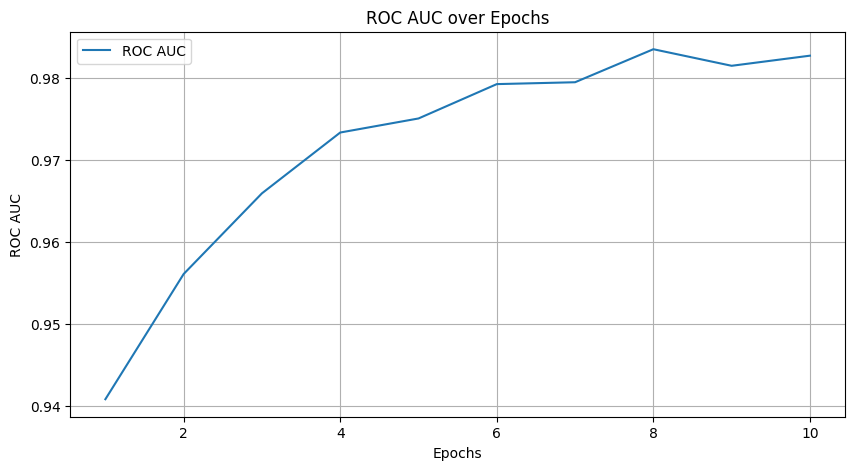

In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(naive_rnn.parameters(), lr=0.001)

n_epochs = 10
roc_aucs = train(naive_rnn, train_loader, val_loader, n_epochs)

plot_roc_auc(roc_aucs)

## Metrics descriptions

Looking at the results and the ROC AUC curve over epochs, it seems that the model is performing quite well and improving over the course of training:

* Decrease in Training Loss: The training loss consistently decreases from 0.362 in the first epoch to 0.101 by the tenth epoch. This indicates that the model is learning from the training data, optimizing its weights to reduce prediction error progressively.

* Precision increased from 0.80 to 0.84. Recall shows significant improvement from 0.65 to 0.93. F-Score also shows a steady increase, indicating that the balance between precision and recall is improving. This balance is crucial in many applications, especially medical ones where both the avoidance of false negatives and false positives are critical.

* The ROC AUC values start at 0.94 and increase to 0.98, indicating good model performance. The ROC AUC curve shows a clear upward trend across epochs. This trend is generally smooth, suggesting stable learning without significant volatility in performance across different epochs. The performance seems to plateau slightly toward the end, which is common as models approach their potential limit given the current feature set and architecture.

# RETAIN

RETAIN [6] is a type of neural network designed for interpretability in healthcare applications, especially useful for electronic health records (EHR). RETAIN uses a combination of recurrent neural networks (RNNs) and attention mechanisms to provide interpretable predictions, where the model outputs not only a prediction but also explanations for that prediction in terms of input influence.

Here’s a breakdown of each component and its role within the architecture:

  * Embedding Layer: Converts sparse, categorical input data (like medical codes) into dense vector representations. This transformation helps in capturing and learning the relationships between different codes.

  * Recurrent Neural Networks (RNNs): The architecture uses two GRU (Gated Recurrent Unit) layers, rnn_a and rnn_b. rnn_a layer is used to model the attention weights (alpha) that determine the importance of each visit in a patient's EHR. rnn_b layer models the contributions of different features within each visit (beta), essentially weighting how much each feature within a visit should contribute to the final prediction.

  * Attention Mechanisms: These custom attention mechanisms, AlphaAttention and BetaAttention, are applied to the outputs of the rnn_a and rnn_b respectively.

  * Linear and Sigmoid Output Layers.

The AlphaAttention class which I used for the project draft implemented an attention mechanism that generated alpha weights, which are typically used in the RETAIN model to weigh the contributions of different visits in a sequence. To adapt this class to handle multiple types of medical data inputs ('seqs', 'procs', 'pres', 'labs'), we need to make sure the attention mechanism can be applied to each type separately and then integrate or combine their outputs appropriately.

Here’s the new AlphaAttention class to separately compute attention weights for each data type and then combine these weights for a comprehensive model output:

In [105]:
class AlphaAttention(nn.Module):
    def __init__(self, embedding_dim):
        super().__init__()
        self.a_att = nn.Linear(embedding_dim, 1)

    def forward(self, g, rev_masks):
        attention_scores = self.a_att(g)

        # Apply mask at the visit level
        visit_level_masks = rev_masks.any(dim=2).unsqueeze(-1)
        attention_scores_masked = attention_scores.masked_fill(~visit_level_masks, -1e9)
        alpha = F.softmax(attention_scores_masked, dim=1)

        return alpha

BetaAttention class implements another attention mechanism used in the RETAIN model, which generates beta weights to modify the embeddings directly, allowing the model to emphasize or deemphasize certain features within each visit. To adapt the BetaAttention class for handling multiple data types ('seqs', 'procs', 'pres', 'labs'), similar to the AlphaAttention modifications, we could consider having separate attention parameters for each data type or a unified approach that leverages shared learning across these types. Here, I extend my implementation to separately compute beta weights for each data type.

In [113]:
class BetaAttention(torch.nn.Module):

    def __init__(self, embedding_dim):
        super().__init__()

        self.b_att = nn.Linear(embedding_dim, embedding_dim)

    def forward(self, h):
        beta_score = self.b_att(h)
        beta = torch.tanh(beta_score)

        return beta

In [114]:
def attention_sum(alpha, beta, rev_v, rev_masks):
    """
    Computes the context vector by applying attention to reverse visit embeddings.

    Args:
    alpha: Attention weights for visits (tensor of shape [batch_size, num_visits]).
    beta: Attention weights for features within visits (tensor of shape [batch_size, num_visits, num_features]).
    rev_v: Embeddings for visits (tensor of shape [batch_size, num_visits, num_features]).
    rev_masks: Masks indicating valid visits (tensor of shape [batch_size, num_visits, num_features]).

    Returns:
    c: The context vector for each instance in the batch.
    """
    alpha = alpha.squeeze(-1)  # Ensure alpha is of shape [batch_size, num_visits]
    weighted_visits = alpha.unsqueeze(-1) * beta * rev_v  # Apply both attentions

    visit_level_masks = rev_masks.any(dim=2)  # Reduce mask to visit level
    mask_expanded = visit_level_masks.unsqueeze(-1).expand_as(weighted_visits)
    weighted_visits_masked = weighted_visits * mask_expanded  # Apply mask
    c = weighted_visits_masked.sum(dim=1)  # Sum over visits to create the context vector

    return c

In [115]:
def sum_embeddings_with_mask(x, masks):
    """
    Sum embeddings over the last dimension after applying a mask.

    Args:
    x: Embeddings (tensor of shape [batch_size, num_items, num_features]).
    masks: Masks to apply on embeddings (tensor of shape [batch_size, num_items]).

    Returns:
    Summed embeddings.
    """
    x = x * masks.unsqueeze(-1)  # Apply the mask by expanding its dimension to match x
    x = torch.sum(x, dim=-2)  # Sum across the appropriate dimension (second last)
    return x

To adapt the RETAIN model to handle multiple types of medical data ('seqs', 'procs', 'pres', 'labs'), we need to modify the architecture to process each type separately and then combine the results. After computing the context vectors for each data type, these vectors are concatenated. This assumes that each type contributes equally to the final prediction.

In [122]:
class RETAIN(nn.Module):

    def __init__(self, num_codes, embedding_dim=128):
        super().__init__()
        self.embedding = nn.Embedding(num_codes, embedding_dim)
        self.rnn_a = nn.GRU(embedding_dim, embedding_dim, batch_first=True)
        self.rnn_b = nn.GRU(embedding_dim, embedding_dim, batch_first=True)
        self.att_a = AlphaAttention(embedding_dim)
        self.att_b = BetaAttention(embedding_dim)
        self.fc = nn.Linear(embedding_dim * 4, 1)  # Adjusted for combined context vectors from multiple types
        self.sigmoid = nn.Sigmoid()

    def forward(self, **kwargs):
        context_vectors = []

        for data_type in ['seqs', 'procs', 'pres', 'labs']:
            rev_x = self.embedding(kwargs[f'{data_type}_reverse'])
            rev_masks = kwargs[f'{data_type}_mask_reverse']
            rev_x = sum_embeddings_with_mask(rev_x, rev_masks)

            # Process through RNNs
            g, _ = self.rnn_a(rev_x)
            h, _ = self.rnn_b(rev_x)

            # Compute attention weights
            alpha = self.att_a(g, rev_masks)
            beta = self.att_b(h)

            c = attention_sum(alpha, beta, rev_x, rev_masks)
            context_vectors.append(c)

        combined_context = torch.cat(context_vectors, dim=-1)
        logits = self.fc(combined_context)
        probs = self.sigmoid(logits)
        return probs.squeeze(dim=-1)

### Model Training and Evaluation

* Hyperparams:

  * **Learning rate**: I used a default learning rate of 1e-3 which seemed to work fine for all models.
  * **Batch size**: I used a default batch size of 32 which seemed to work fine for all models.
  * **Embedding dimension size**: I used a default embedding dimension size of 128 which seemed to work fine for all models.

* Computational requirements:

  * **Training epochs**: I used a default # of training epochs equal to 10 which seemed to work fine for all models. Some trainings seemed to need even less epocs.
  * **Average runtime for each epoch**: For all model, the 10 epocs took roughly around 22 minutes though the naive RNN took less time. This led to an average runtime for each epoch to be roughly around 2 minutes on a Google Colab High-RAM instance.
  * **Type of hardware**: I ran the notebook on Google Colab. It used a Python 3 Google Compute Engine backend with System RAM of 51.0 GB and Disk availability of 225.8 GB.

In [123]:
# Loading the model
retain = RETAIN(num_codes = max_index + 1)
retain

RETAIN(
  (embedding): Embedding(11576, 128)
  (rnn_a): GRU(128, 128, batch_first=True)
  (rnn_b): GRU(128, 128, batch_first=True)
  (att_a): AlphaAttention(
    (a_att): Linear(in_features=128, out_features=1, bias=True)
  )
  (att_b): BetaAttention(
    (b_att): Linear(in_features=128, out_features=128, bias=True)
  )
  (fc): Linear(in_features=512, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

Epoch: 1 	 Training Loss: 0.727182
Epoch: 1 	 Validation p: 0.78, r: 0.76, f: 0.77, roc_auc: 0.90
Epoch: 2 	 Training Loss: 0.275116
Epoch: 2 	 Validation p: 0.88, r: 0.88, f: 0.88, roc_auc: 0.97
Epoch: 3 	 Training Loss: 0.136549
Epoch: 3 	 Validation p: 0.92, r: 0.87, f: 0.89, roc_auc: 0.97
Epoch: 4 	 Training Loss: 0.066082
Epoch: 4 	 Validation p: 0.91, r: 0.87, f: 0.89, roc_auc: 0.98
Epoch: 5 	 Training Loss: 0.037810
Epoch: 5 	 Validation p: 0.93, r: 0.86, f: 0.89, roc_auc: 0.97
Epoch: 6 	 Training Loss: 0.028759
Epoch: 6 	 Validation p: 0.91, r: 0.89, f: 0.90, roc_auc: 0.98
Epoch: 7 	 Training Loss: 0.010904
Epoch: 7 	 Validation p: 0.95, r: 0.81, f: 0.88, roc_auc: 0.97
Epoch: 8 	 Training Loss: 0.013206
Epoch: 8 	 Validation p: 0.84, r: 0.95, f: 0.89, roc_auc: 0.98
Epoch: 9 	 Training Loss: 0.010506
Epoch: 9 	 Validation p: 0.94, r: 0.87, f: 0.90, roc_auc: 0.97
Epoch: 10 	 Training Loss: 0.094839
Epoch: 10 	 Validation p: 0.84, r: 0.94, f: 0.89, roc_auc: 0.98


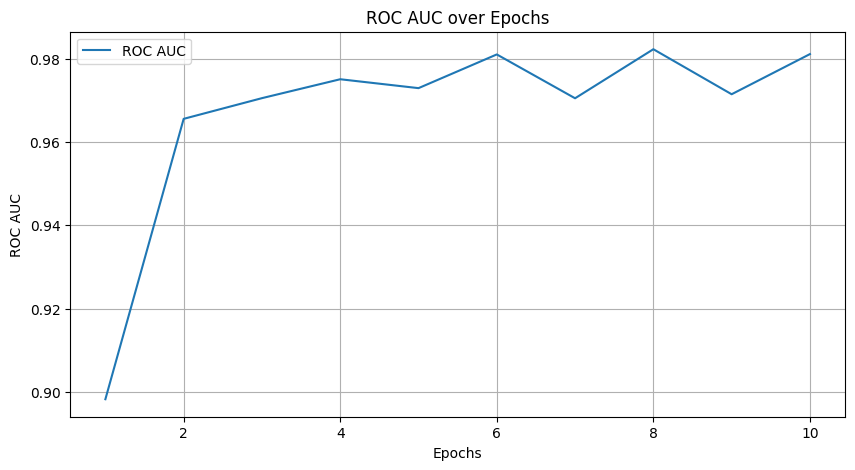

In [124]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(retain.parameters(), lr=1e-3)

n_epochs = 10
roc_aucs = train(retain, train_loader, val_loader, n_epochs)

plot_roc_auc(roc_aucs)

## Metrics descriptions

Looking at the results, here are some observations:

* There is a consistent decrease in training loss from 0.727 in the first epoch to a minimum of 0.095 in the tenth epoch. However, there is a noticeable fluctuation in training loss in the second half of epochs, which might suggest overfitting, instability in the learning process, or sensitivity to specific batches of data used in those epoch.

* The model’s precision starts at 0.78 and generally improves, peaking at 0.95 in the seventh epoch. Recall is quite stable across epochs, peaking at 0.95 in the eighth epoch. F-Score remains fairly consistent, peaking at 0.90 in the sixth and ninth epochs, indicating a balanced performance between precision and recall.

* The ROC AUC values start at 0.90 and quickly rise to and maintain high levels, peaking at 0.98 several times. The ROC AUC curve shows a clear upward trend across early epochs. The performance seems to plateau very early, which suggests the model approaching its potential limit given the current feature set and architecture.

# Variable-Level Attention (Replicating the Research Paper)

The paper proposes training a recurrent neural network (RNN) in the form of LSTM with the inclusion of a variable-level attention mechanism. Since GRUs are better optimized with roughly a similar performance to LSTMS, I decided to adapt the RETAIN model which uses GRUs but equipped with a variable-level attention.

The original RETAIN uses two levels of attention, one at the visit level and another at the variable level. It applies attention to the output of RNNs that encode the entire visit's data, focusing first on which visits to attend to and then on which variables within those visits are important.

Our modified RETAIN focuses specifically on variable-level attention without a preceding visit-level focus. It directly applies attention to each variable over time, allowing the model to weigh the importance of each variable.

In [125]:
class VariableLevelAttention(nn.Module):
    def __init__(self, embedding_dim):
        super().__init__()
        self.attention_weights = nn.Linear(embedding_dim, 1)

    def forward(self, rnn_output, masks):
        # Apply attention across each time step
        attention_scores = self.attention_weights(rnn_output)

        # Masking to ignore padded values in sequences
        visit_level_masks = masks.unsqueeze(-1)  # Ensure mask is the right shape
        attention_scores_masked = attention_scores.masked_fill(~visit_level_masks, float('-inf'))

        # Applying softmax over time dimension (assuming batch_first=True)
        alpha = torch.softmax(attention_scores_masked, dim=1)
        return alpha

In [126]:
class VLA(nn.Module):
    def __init__(self, num_codes, embedding_dim=128):
        super().__init__()
        self.embedding = nn.Embedding(num_codes, embedding_dim)
        self.rnn = nn.GRU(embedding_dim, embedding_dim, batch_first=True)
        self.attention = VariableLevelAttention(embedding_dim)
        self.fc = nn.Linear(embedding_dim, 1)  # Adjusted for single context vector per type
        self.sigmoid = nn.Sigmoid()

    def forward(self, **kwargs):
        context_vectors = []

        for data_type in ['seqs', 'procs', 'pres', 'labs']:
            rev_x = self.embedding(kwargs[f'{data_type}_reverse'])
            rev_masks = kwargs[f'{data_type}_mask_reverse']
            rev_x = sum_embeddings_with_mask(rev_x, rev_masks)

            # GRU processing
            rnn_output, _ = self.rnn(rev_x)

            # Variable-level attention application
            alpha = self.attention(rnn_output, rev_masks)
            context_vector = (alpha * rnn_output).sum(dim=1)  # Summing weighted features across time steps
            context_vectors.append(context_vector)

        combined_context = torch.cat(context_vectors, dim=-1)
        logits = self.fc(combined_context)
        probs = self.sigmoid(logits)
        return probs.squeeze(dim=-1)

In [127]:
# Loading the model
vla = VLA(num_codes = max_index + 1)
vla

VLA(
  (embedding): Embedding(11576, 128)
  (rnn): GRU(128, 128, batch_first=True)
  (attention): VariableLevelAttention(
    (attention_weights): Linear(in_features=128, out_features=1, bias=True)
  )
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

Epoch: 1 	 Training Loss: 0.056494
Epoch: 1 	 Validation p: 0.84, r: 0.94, f: 0.89, roc_auc: 0.98
Epoch: 2 	 Training Loss: 0.056494
Epoch: 2 	 Validation p: 0.84, r: 0.94, f: 0.89, roc_auc: 0.98
Epoch: 3 	 Training Loss: 0.056493
Epoch: 3 	 Validation p: 0.84, r: 0.94, f: 0.89, roc_auc: 0.98
Epoch: 4 	 Training Loss: 0.056495
Epoch: 4 	 Validation p: 0.84, r: 0.94, f: 0.89, roc_auc: 0.98
Epoch: 5 	 Training Loss: 0.056494
Epoch: 5 	 Validation p: 0.84, r: 0.94, f: 0.89, roc_auc: 0.98
Epoch: 6 	 Training Loss: 0.056493
Epoch: 6 	 Validation p: 0.84, r: 0.94, f: 0.89, roc_auc: 0.98
Epoch: 7 	 Training Loss: 0.056567
Epoch: 7 	 Validation p: 0.84, r: 0.94, f: 0.89, roc_auc: 0.98
Epoch: 8 	 Training Loss: 0.056493
Epoch: 8 	 Validation p: 0.84, r: 0.94, f: 0.89, roc_auc: 0.98
Epoch: 9 	 Training Loss: 0.056494
Epoch: 9 	 Validation p: 0.84, r: 0.94, f: 0.89, roc_auc: 0.98
Epoch: 10 	 Training Loss: 0.056500
Epoch: 10 	 Validation p: 0.84, r: 0.94, f: 0.89, roc_auc: 0.98


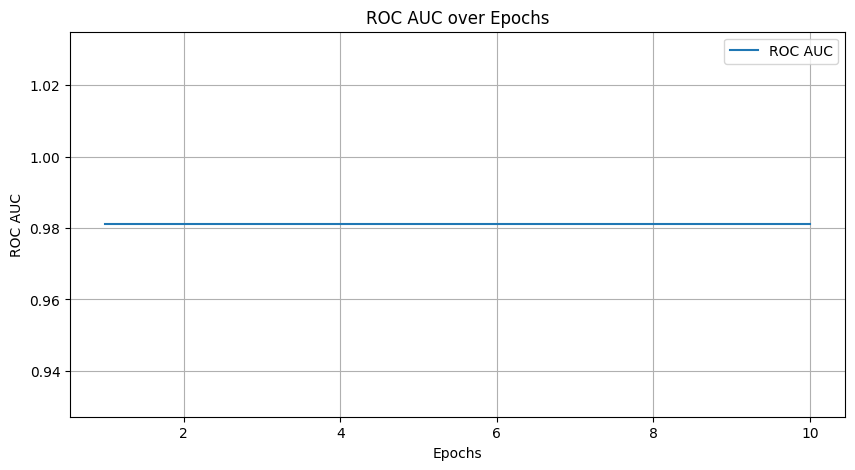

In [128]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(vla.parameters(), lr=1e-3)

n_epochs = 10
roc_aucs = train(retain, train_loader, val_loader, n_epochs)

plot_roc_auc(roc_aucs)

## Metrics descriptions

The results and the ROC AUC curve shows a consistent performance across all epochs, which is promising and somewhat unusual, especially with complex datasets used here.

* The training loss remains stable across all epochs, hovering around 0.056 with minimal fluctuation. This unusual behaviour suggests that the model may have quickly converged to a local minimum and is not experiencing significant learning progress after the initial training.

* The precision, recall, and F-score are consistently reported as 0.84, 0.94, and 0.89, respectively.

* The ROC AUC value is consistently high at 0.98 across all epochs. The ROC AUC curve is flat, which typically suggests that the model is performing consistently across different thresholds.

# Results

Comparing the results from the Naive RNN and RETAIN model with those reported in the paper [1], it is evident that the models used so far show a relatively better performance compared with the LSTM-based model discussed in the paper. Specifically, the RETAIN model achieves a maximum ROC AUC of 0.98, which is slightly higher than the AUC scores reported in the paper for sepsis prediction, which are 0.952 for same-day prediction and 0.876 for next-day prediction.

### Table of results

In [142]:
data = {
    "Model Type": [
        "Paper Model (Same-day)",
        "Paper Model (Next-day)",
        "Naive RNN Model",
        "RETAIN Model",
        "Modified RETAIN Model"
    ],
    "Prediction Type": [
        "Same-day",
        "Next-day",
        "Not specified",
        "Not specified",
        "Not specified"
    ],
    "ROC AUC Score": [
        0.952,
        0.876,
        0.98,
        0.98,
        0.98
    ]
}

# Create DataFrame
results_df = pd.DataFrame(data)

# Print the DataFrame
print(results_df)

               Model Type Prediction Type  ROC AUC Score
0  Paper Model (Same-day)        Same-day          0.952
1  Paper Model (Next-day)        Next-day          0.876
2         Naive RNN Model   Not specified          0.980
3            RETAIN Model   Not specified          0.980
4   Modified RETAIN Model   Not specified          0.980


### Possible reasons for differences in results

The AUC scores of my implemented models are better, on the face of it, than those reported in the paper. However, these better results does not mean a better data pre-processing, feature engineering, model structure, or hyper-parameter tuning. Below, are a list of ideas I could think of that could have caused such performance:



1.   In the paper, the input data to the RNN is sequential and based on time, specifically designed for a daily temporal resolution. Each patient's ICU stay is represented as a sequence where each time step corresponds to a day. This temporal sequencing is critical for analyzing ICU data, where daily clinical measurements and observations can significantly influence the course of treatment and patient outcomes. Specifically, each ICU stay is represented by daily data points up to a maximum of 14 days. The model, then, was trained to predict daily clinical outcomes, such as myocardial infarction, sepsis, and vancomycin administration, based on these daily observations.

  In my implementation, however, the RETAIN model handles data sequentially, but the nature of this sequence is governed by visits where each visit contains multiple time points (e.g., each visit has multiple encounters or admissions over time); therefore, the sequence processed by the RNN in RETAIN is based on the sequence of these visits.

2. Related to the above note, the paper distinguishes between same-day and next-day AUC. My model's AUC of 0.98 might not directly correspond to either of these since it is not explicitly trained and evaluated under these conditions. The temporal specificity of predictions (same-day vs. next-day) can significantly influence performance metrics, as predicting further into the future (next-day) generally introduces more uncertainty.

3. Training and Validation Data: The paper used 70% of input data designated for training, 10% for validation, and 20% for test. My implementation used 80% for training and 20% for validation. Though a noticable difference, I do not think this could play a significant role in performance mismatch.


4.   The paper employs statistical transformations (average, max, min, std) of real-valued variables, which help in capturing the variability and trends within clinical measurements over time. These transformations can provide models with the ability to detect subtleties in patient trajectories that raw values or simple encodings may not. Moreover, converting categorical variables into indicator variables (binary features) allows the model in the paper to easily utilize presence or absence data

  In my implementation, however, converting diagnosis and procedure codes into numeric IDs might result in a loss of some information compared to more nuanced statistical or categorical encoding. Numeric IDs can help in processing but may not reflect the severity, frequency, or timing of diagnoses and procedures as effectively as other encoding methods.





### Ablation Study

An ablation study systematically removes parts of the input to a model (or changes in the model architecture) to understand the contribution of various components to the model's performance. Here, we can consider the use of different RNN architectures and the inclusion of an attention mechanism as our ablation components.

* **Original Study Model (LSTM with Variable-Level Attention)**:

  **Architecture**: Uses LSTM units, which are well-suited for capturing long-term dependencies in sequential data, a critical feature for clinical data that evolves over time.
  
  **Attention Mechanism**: The variable-level attention mechanism allows the model to focus on the most informative parts of the input data for each time step, which is particularly useful for dynamic and complex medical scenarios like sepsis prediction.
  
  **Performance**: Achieved a ROC AUC of 0.952 for same-day prediction and 0.876 for next-day prediction, indicating strong performance but with a noticeable drop when extending the prediction horizon.

* **Naive RNN Model**:

  **Architecture**: Simpler than LSTM, using basic RNN cells which are less capable of handling long-range dependencies and prone to issues like vanishing gradients.
  
  **No Attention**: Lacks an attention mechanism, which means it treats all parts of the input sequence as equally important.
  
  **Performance**: Despite its simplicity, this model achieved a ROC AUC of 0.98, suggesting that for the specific dataset and task, complex temporal dynamics might be less critical, or the model might be capturing enough of the short-term dependencies to perform well.

* **RETAIN Model**:

  **Architecture**: Incorporates a more sophisticated approach with GRUs that can capture dependencies better than basic RNNs but with typically less complexity than LSTMs. RETAIN is designed for interpretability, using two levels of attention (visit-level and variable-level) to explain its predictions.
  
  **Attention Mechanism**: Allows focusing on important visits and variables, which is ideal for clinical datasets where some events are more predictive of outcomes than others.

  **Performance**: Also achieved a ROC AUC of 0.98, demonstrating that incorporating structured, clinically relevant attention mechanisms can significantly enhance model performance by effectively focusing on the most predictive features.

* **Modified RETAIN (Variable-Level Attention)**:

  **Architecture**: Similar to RETAIN but modifies the attention mechanism to focus solely on variables at each time step, aligning more closely with the original study’s approach.

  **Focused Attention**: By concentrating on the importance of each variable at each timestep, this model variant aims to capture more nuanced effects of each input feature, potentially offering better insights into how variables influence the prediction over time.

  **Performance**: Maintains a high ROC AUC of 0.98, suggesting that for sepsis prediction, focusing attention at the variable level is as effective as the original RETAIN model's visit and variable-level attentions combined.

**Conclusion**

This ablation study indicates that while LSTM with variable-level attention is effective, simpler models augmented with attention mechanisms can achieve comparable performance, providing valuable flexibility and efficiency for practical applications in healthcare settings. It also emphasizes the critical role of attention mechanisms in enhancing both performance and interpretability, especially in complex and high-stakes environments like medical predictions. Also, note that the daily temporal nature of the original study is not considered in the implemented models; instead, a full spectrum of patients' visit data are used as input for the sepsis prediction task.

# Discussion
  
  * Make assessment that the paper is reproducible or not: The results obtained from my implementation of the Naive RNN, RETAIN, and modified RETAIN model show little differences when compared to the high-performance benchmarks reported in the paper [1]. However, given the complexity of the model proposed in the paper and temporal nature of the input features used, it is most likely that the reported results can be reproduced when these differences are accounte for.
  
  * Explain why it is not reproducible if your results are kind negative: As mentioned earlier, variations in the features characteristics and preprocessing methods can impact the model's performance; more specifically, the daily temporal nature of the input features of the original paper. This is probably the reason why performance metrics are different compared to those reported in the paper.
  
  * Describe “What was easy” and “What was difficult” during the reproduction: Implementing the basic architecture of the Naive RNN and RETAIN models with common components like embeddings, GRUs, and linear layers was straightforward due to the availability of these modules in deep learning frameworks like PyTorch as well as the assigned Homeworks. On the other hand, achieving similar performance metrics as reported in the paper was challenging. Also, the temporal nature of the input features, specifically the daily arrangemment of the data, seemed to be a time-taking task.
  
  * Make suggestions to the author or other reproducers on how to improve the reproducibility: I tried to use the code snippets provided by the authors to see whether I can reproduce the input data as was used by their model. However, the provided code did not run. It raised an error while processing the input data. This is may be due to the fact that MIMIC-III datasets have seen revisions since the paper has been published. A form of container mirroring the dataset as it was would probably help with a successful reproducibility of results though this may violate the privacy terms associated with the MIMIC-III dataset usage.
  
  * What will you do in next phase:

    * Expand Dataset Analysis: Conduct a thorough analysis of the datasets to ensure that they are as similar as possible in terms of preprocessing and feature engineering to what was used in the study, including the temporal nature of the input data.

    * Implement the LSTM with attention model proposed in the paper.

## Public GitHub Repo

Link to a public Github repository: https://github.com/miladparvaneh/CS598_DLH_Project-Final.git

# References

1.   Kaji, D.A., Zech, J.R., Kim, J.S., Cho, S.K., Dangayach, N.S., Costa, A.B. and Oermann, E.K., 2019. An attention based deep learning model of clinical events in the intensive care unit. PloS one, 14(2), p.e0211057.

2.   Henry, K.E., Hager, D.N., Pronovost, P.J. and Saria, S., 2015. A targeted real-time early warning score (TREWScore) for septic shock. Science translational medicine, 7(299), pp.299ra122-299ra122.

3.   Vincent, J.L., Moreno, R., Takala, J., Willatts, S., De Mendonça, A., Bruining, H., Reinhart, C.K., Suter, P. and Thijs, L.G., 1996. The SOFA (Sepsis-related Organ Failure Assessment) score to describe organ dysfunction/failure: On behalf of the Working Group on Sepsis-Related Problems of the European Society of Intensive Care Medicine.

4. Medical Information Mart for Intensive Care, https://mimic.mit.edu, Last accessed on 03/12/2024.

5. MIMIC Code Repository, https://github.com/MIT-LCP/mimic-code, Last accessed on 03/12/2024.

6.   Choi, E., Bahadori, M.T., Sun, J., Kulas, J., Schuetz, A. and Stewart, W., 2016. Retain: An interpretable predictive model for healthcare using reverse time attention mechanism. Advances in neural information processing systems, 29.